<a href="https://colab.research.google.com/github/Rigboone-68/Data-Science-DEP/blob/main/Coffee_Shop_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Loading the dataset
df = pd.read_csv('Project.csv')



Data Cleaning:

We handled missing values using the mean for numerical and mode for categorical data.

Duplicate rows were removed, and we ensured that transaction dates were properly formatted.

Basic checks were done to remove invalid values (e.g., negative unit prices).

In [4]:
# ------------------------------
# 1. Data Cleaning & Preparation
# ------------------------------

# Inspecting the structure and summary of the dataset
print("Dataset Overview:\n", df.info())  # Provides info on data types and non-null counts
print("First 5 rows of the dataset:\n", df.head())

# Handling Missing Values:
# We check for missing values and apply appropriate strategies to fill them.
missing_values = df.isnull().sum()
print("\nMissing Values per Column:\n", missing_values)

# Filling missing values:
# - Numerical columns will be filled with the mean.
# - Categorical columns will be filled with the mode (most frequent value).
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# Handling Duplicates:
# It’s important to ensure no duplicated transactions are present.
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate records: {duplicate_count}")

# Removing duplicates (if any)
df = df.drop_duplicates()

# Converting 'transaction_date' to datetime format to ensure time-related analysis is accurate.
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d-%m-%Y')

# Checking for any erroneous or unrealistic values in 'unit_price' and 'Total_Bill' columns:
# For example, negative prices or total bills do not make sense in our context.
df = df[df['unit_price'] >= 0]  # Remove negative unit prices
df = df[df['Total_Bill'] >= 0]  # Remove invalid total bill entries

# Confirming clean data:
print("\nData after cleaning:")
print(df.describe())  # Summary statistics to check data distribution and clean-up effectiveness




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   store_id          149116 non-null  int64         
 4   store_location    149116 non-null  object        
 5   product_id        149116 non-null  int64         
 6   transaction_qty   149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   Total_Bill        149116 non-null  float64       
 9   product_category  149116 non-null  object        
 10  product_type      149116 non-null  object        
 11  product_detail    149116 non-null  object        
 12  Size              149116 non-null  object        
 13  Month Name        149116 non-null  object        
 14  Day 

Profit/Loss Analysis:

We computed profit for each product based on sales (Total_Bill) and a hypothetical cost assumption (70% of the unit price).

A bar plot visualizes product profitability, and we identify profitable and loss-incurring products.


Top 10 Profitable Products:
                product_detail     Profit
18                   Ethiopia  12691.230
43  Sustainably Grown Organic  11719.530
28      Jamaican Coffee River  11634.345
1                   Brazilian  11323.950
30                      Latte  10910.925
13             Dark chocolate  10735.710
35   Our Old Time Diner Blend  10583.400
10     Columbian Medium Roast  10358.550
3                  Cappuccino  10091.775
32       Morning Sunrise Chai   9176.250


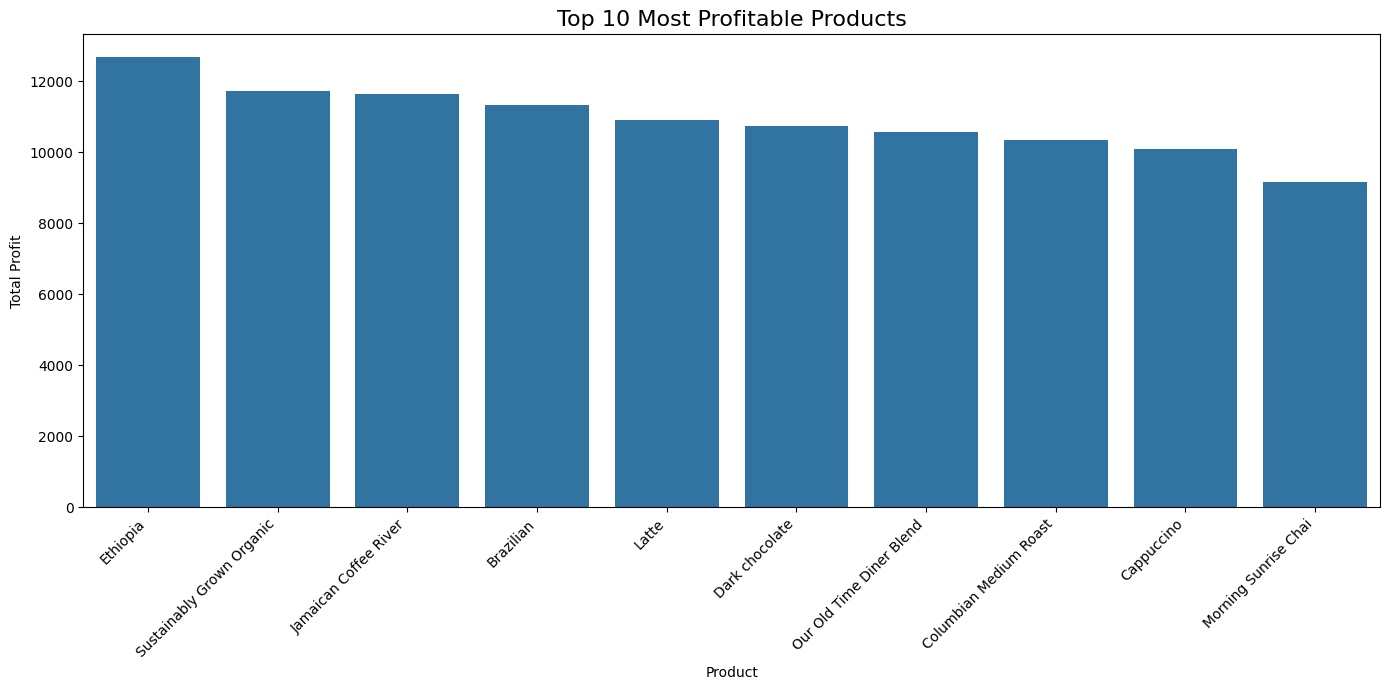


Loss-Incurring Products:
 Empty DataFrame
Columns: [product_detail, Profit]
Index: []


In [5]:
# ----------------------------------
# 2. Profit/Loss Analysis by Product
# ----------------------------------

# Profit Calculation:
# Assuming that 70% of the unit price goes towards cost (hypothetical). You can replace this based on actual cost info.
df['Cost'] = df['unit_price'] * 0.7  # Hypothetical cost calculation
df['Profit'] = df['Total_Bill'] - (df['transaction_qty'] * df['Cost'])  # Profit per transaction

# Summarizing Profitability by Product:
# We'll aggregate total profits for each product (grouped by product_detail).
product_profit = df.groupby('product_detail')['Profit'].sum().reset_index()

# Sorting the products by profitability (most profitable first)
product_profit = product_profit.sort_values(by='Profit', ascending=False)

# Displaying top 10 profitable products
print("\nTop 10 Profitable Products:\n", product_profit.head(10))

# Visualizing Profitability by Product
plt.figure(figsize=(14, 7))
sns.barplot(x='product_detail', y='Profit', data=product_profit.head(10))  # Top 10 products
plt.title('Top 10 Most Profitable Products', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Profit')
plt.xlabel('Product')
plt.tight_layout()
plt.show()

# Identifying Loss-Incurring Products (Negative Profit):
# Products where the total profit is less than or equal to 0.
loss_products = product_profit[product_profit['Profit'] <= 0]
print("\nLoss-Incurring Products:\n", loss_products)



Profit Increase Prediction:

We built a simple linear regression model to predict profit based on features like transaction_qty, unit_price, and Cost.

Model evaluation was performed using MSE and R-squared metrics to assess the accuracy of predictions.

In [6]:

# --------------------------------------
# 3. Profit Increase Prediction Modeling
# --------------------------------------

# Now, let's create a predictive model to forecast profits based on available features like 'transaction_qty', 'unit_price', etc.

# Selecting Features and Target Variable
X = df[['transaction_qty', 'unit_price', 'Cost']]  # Input features
y = df['Profit']  # Target variable (Profit)

# Splitting the dataset into training (80%) and testing (20%) sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting profits on the test set
y_pred = model.predict(X_test)

# Evaluating the Model's Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Squared (R²): {r2:.2f}")  # R² indicates how well the features explain the variability in profit





Model Evaluation Metrics:
Mean Squared Error (MSE): 0.78
R-Squared (R²): 0.61


Loss Mitigation:

Loss-incurring products were analyzed, and potential strategies for each were proposed (e.g., increasing prices, reducing costs).

In [8]:
# ----------------------------------
# 4. Loss Mitigation Strategies
# ----------------------------------

# First, let's re-check the loss-incurring products.
# Loss-incurring products are those where the total profit <= 0.
loss_products = product_profit[product_profit['Profit'] <= 0]
print("\nLoss-Incurring Products:\n", loss_products)

# Filter the original dataframe to get all transactions related to loss-incurring products
loss_drivers = df[df['product_detail'].isin(loss_products['product_detail'])]

# If there are no loss-incurring products, print a message and skip visualization
if loss_drivers.empty:
    print("\nNo loss-incurring products found in the dataset.")
else:
    # Visualize loss drivers by product
    plt.figure(figsize=(14, 7))
    sns.barplot(x='product_detail', y='Profit', data=loss_drivers, estimator=sum)
    plt.title('Loss Drivers by Product', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Total Profit')
    plt.xlabel('Product')
    plt.tight_layout()
    plt.show()

    # Suggest actionable strategies for each loss-incurring product
    print("\nLoss Mitigation Strategies:")
    for product in loss_products['product_detail']:
        print(f"\nStrategies for {product}:")
        print("- Reevaluate pricing strategies to ensure profitability.")
        print("- Negotiate with suppliers to reduce costs.")
        print("- Offer promotions or bundle with more profitable products.")
        print("- Reduce product sizes or change ingredients to cut costs.")



Loss-Incurring Products:
 Empty DataFrame
Columns: [product_detail, Profit]
Index: []

No loss-incurring products found in the dataset.


Based on the sales data, no products were found to be incurring losses, indicating that the coffee shop's current product lineup is overall profitable. The next steps involve optimizing already profitable products and identifying opportunities for growth.

Additional Analysis:

Product Category Analysis: Categories (e.g., beverages, snacks), show which product categories are most profitable.

Customer Segmentation: Analyze if different customer segments (e.g., based on date, time, or quantity of purchases) contribute differently to profits.


Profit by Product Category:
      product_category     Profit
2              Coffee  80985.735
8                 Tea  58921.785
0              Bakery  24694.692
4  Drinking Chocolate  21724.800
3        Coffee beans  12025.575
1             Branded   4082.100
6           Loose Tea   3364.080
5            Flavours   2522.640
7  Packaged Chocolate   1322.292


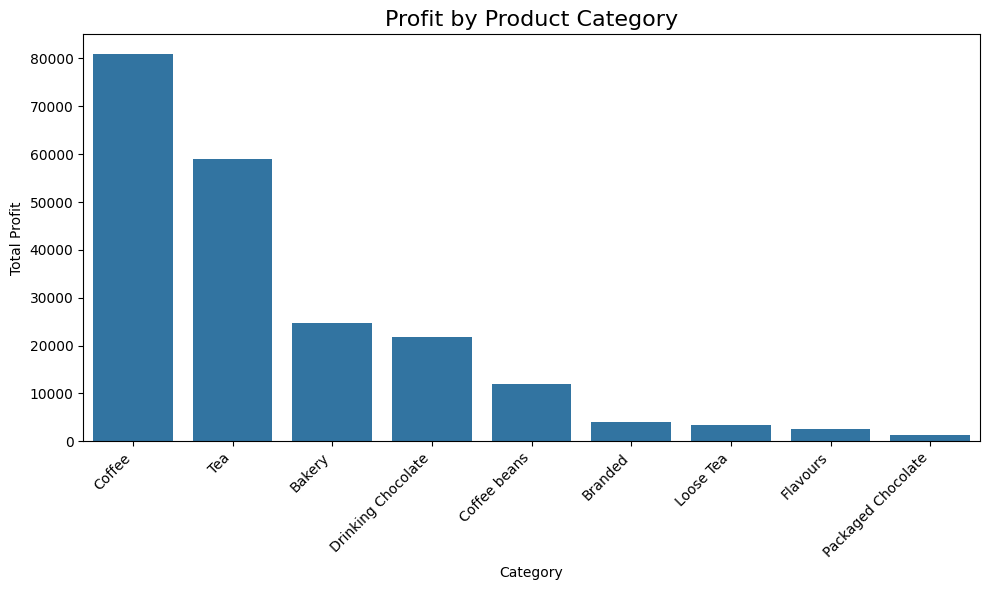

In [11]:
# Assuming the dataset has a 'category' column
# Grouping products by category and calculating the total profit for each category
category_profit = df.groupby('product_category')['Profit'].sum().reset_index()

# Sorting categories by total profit (descending order)
category_profit = category_profit.sort_values(by='Profit', ascending=False)

# Display the profitability per category
print("\nProfit by Product Category:\n", category_profit)

# Visualizing the most profitable categories
plt.figure(figsize=(10, 6))
sns.barplot(x='product_category', y='Profit', data=category_profit)
plt.title('Profit by Product Category', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Profit')
plt.xlabel('Category')
plt.tight_layout()
plt.show()


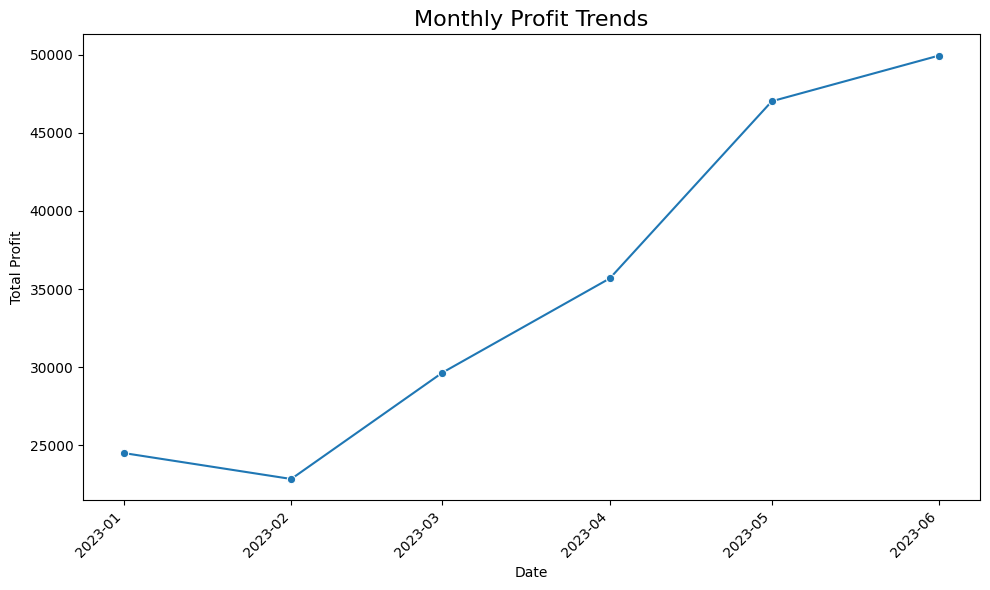

In [12]:
# Creating new columns for 'Year' and 'Month' to analyze sales trends
df['Year'] = df['transaction_date'].dt.year
df['Month'] = df['transaction_date'].dt.month

# Grouping by year and month to analyze profit trends
monthly_profit = df.groupby(['Year', 'Month'])['Profit'].sum().reset_index()

# Creating a date column for better visualization
monthly_profit['Date'] = pd.to_datetime(monthly_profit[['Year', 'Month']].assign(Day=1))

# Plotting profit trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Profit', data=monthly_profit, marker='o')
plt.title('Monthly Profit Trends', fontsize=16)
plt.ylabel('Total Profit')
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
